<h1 align=center><font size = 5>BINNING AND MERGING DATA</font></h1>

## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref1">binning</a></p></li>
<li><a href="#ref1">scale and normalize data</a></p></li>
<li><a href="#ref2">merge data </a></p></li>
<br>
</div>


---





NAME:  MUHAMMAD AJRUL AMIN BIN MOHD ZAIDI<br>
MATRIC No: A194789

###references:
[1] http://www.datasciencemadesimple.com/binning-or-bucketing-of-column-in-pandas-python-2/<br>
[2] https://www.datacamp.com/community/tutorials/joining-dataframes-pandas <br>


In [14]:
import pandas as pd
import numpy as np

In [15]:
#Create a DataFrame
df1 = {
    'Name':['Suzani','Enna','Anuar','Amil','Ravi','Shikin','Ali',''],
    'Score':[63,48,56,75,32,77,85,50]
   }

In [16]:
df1 = pd.DataFrame(df1,columns=['Name','Score'])
print(df1)

     Name  Score
0  Suzani     63
1    Enna     48
2   Anuar     56
3    Amil     75
4    Ravi     32
5  Shikin     77
6     Ali     85
7             50


## 1. Binning
Numerical data can be on very large scales. It is easier to bin/basket the values into groups. Binning is usefuly in  performing  descriptive statistics since groups can be use as a generalization of patterns in the data. Here,cut() method: binning values into discrete intervals<br>
See : https://pandas.pydata.org/docs/reference/api/pandas.cut.html <br>

In [17]:
#binning or bucketing with range
bins = [0, 25, 50, 75, 100]
df1['binned'] = pd.cut(df1['Score'], bins)
print (df1)
df1.isnull()

     Name  Score     binned
0  Suzani     63   (50, 75]
1    Enna     48   (25, 50]
2   Anuar     56   (50, 75]
3    Amil     75   (50, 75]
4    Ravi     32   (25, 50]
5  Shikin     77  (75, 100]
6     Ali     85  (75, 100]
7             50   (25, 50]


,Name,Score,binned
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False


In [18]:
df2 = df1.copy()
bins = [0, 25, 50, 75, 100]
labels =[4,3,2,1]
df2['grade'] = pd.cut(df2['Score'], bins,labels=labels) #cut() Method: Bin Values into Discrete Intervals
print (df2)

     Name  Score     binned grade
0  Suzani     63   (50, 75]     2
1    Enna     48   (25, 50]     3
2   Anuar     56   (50, 75]     2
3    Amil     75   (50, 75]     2
4    Ravi     32   (25, 50]     3
5  Shikin     77  (75, 100]     1
6     Ali     85  (75, 100]     1
7             50   (25, 50]     3


## EXERCISE 1a: NOW, IT'S YOUR TURN<br>

copy 'df1' dataframe as 'dfgrade' and use dataframe 'dfgrade' to do:
1. change the labels 1,2,3 and 4 into A,B, C and D.
2. change the column name into 'grade'
3. print out the dataframe 'dfgrade'



In [19]:
#your code start here
dfgrade = df1.copy()
bins = [0, 25, 50, 75, 100]
labels = ['D','C','B','A']
dfgrade['grade'] = pd.cut(dfgrade['Score'], bins=bins, labels=labels)
print (dfgrade)

     Name  Score     binned grade
0  Suzani     63   (50, 75]     B
1    Enna     48   (25, 50]     C
2   Anuar     56   (50, 75]     B
3    Amil     75   (50, 75]     B
4    Ravi     32   (25, 50]     C
5  Shikin     77  (75, 100]     A
6     Ali     85  (75, 100]     A
7             50   (25, 50]     C


## EXERCISE 1b: NOW, IT'S YOUR TURN<br>

copy 'df1' dataframe as 'dfpassing'' and use dataframe 'dfpassing' to do:<br>
step 1. group the score into only two group 0-50, 51-100 <br>
step 2. name the group as 'pass', 'fail'<br>
step 3. name the group in step 2 as 'passing'<br>
step 4. save as different dataframe<br>
step 5. print out the dataframe<br>

In [20]:
#your code start here
dfpassing = df1.copy()
bins = [0,50,100]
labels = ['pass','fail']
dfpassing['passing'] = pd.cut(dfpassing['Score'], bins=bins, labels=labels) #cut() Method: Bin Values into Discrete Intervals
print (dfpassing)

     Name  Score     binned passing
0  Suzani     63   (50, 75]    fail
1    Enna     48   (25, 50]    pass
2   Anuar     56   (50, 75]    fail
3    Amil     75   (50, 75]    fail
4    Ravi     32   (25, 50]    pass
5  Shikin     77  (75, 100]    fail
6     Ali     85  (75, 100]    fail
7             50   (25, 50]    pass


## 2. Scale and normalize data (Kaggle workspace)
https://www.kaggle.com/jfeng1023/data-cleaning-challenge-scale-and-normalize-data

In [21]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("/content/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

kickstarters_2017.head()
kickstarters_2017.shape

(378661, 15)

<ipython-input-22-052bd1045ab4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
<ipython-input-22-052bd1045ab4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

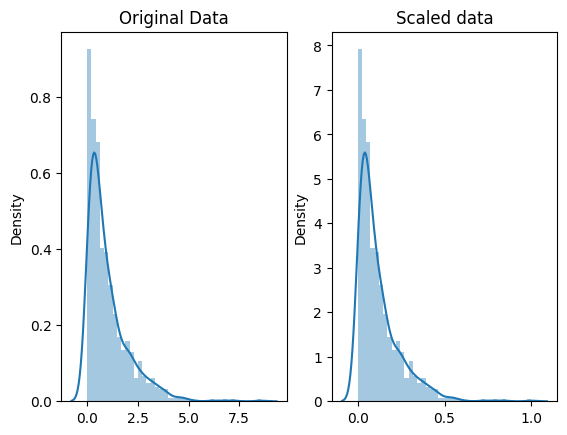

In [22]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

<ipython-input-23-97840d41628b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
<ipython-input-23-97840d41628b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

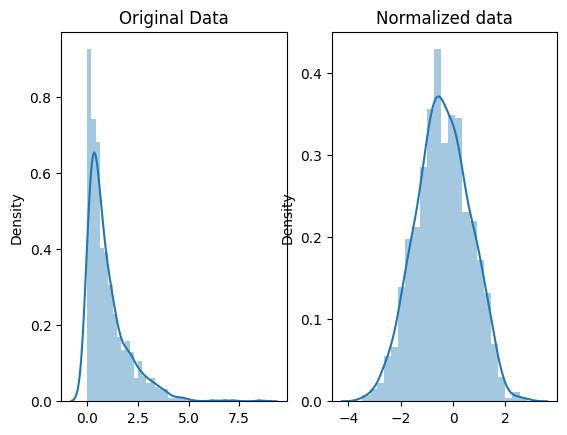

In [23]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

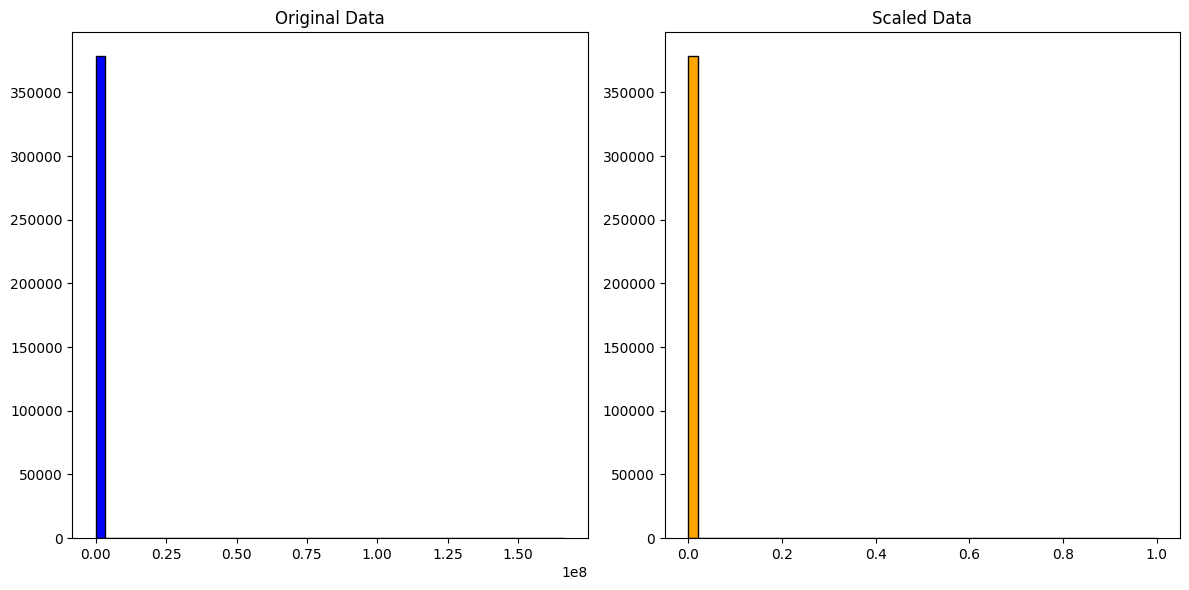

In [24]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Scale the usd_goal_real column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(kickstarters_2017[['usd_goal_real']])

# Plot only histograms (remove KDE for speed)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(kickstarters_2017['usd_goal_real'], bins=50, color="blue", edgecolor="black")
ax[0].set_title("Original Data")
ax[1].hist(scaled_data.flatten(), bins=50, color="orange", edgecolor="black")
ax[1].set_title("Scaled Data")
plt.tight_layout()
plt.show()


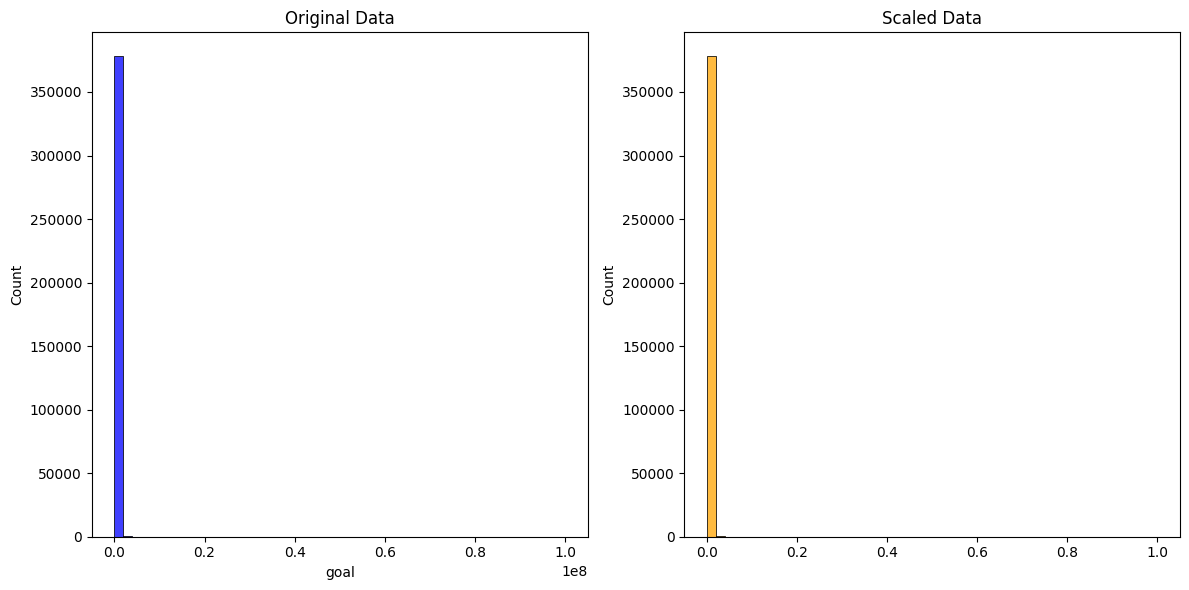

In [25]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the "goal" column using MinMaxScaler
goal = kickstarters_2017[['goal']]  # Select column as a DataFrame
scaler = MinMaxScaler()
scaled_goal = scaler.fit_transform(goal)

# Plot the original & scaled data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot original data
sns.histplot(kickstarters_2017['goal'], ax=ax[0], kde=False, bins=50, color="blue")
ax[0].set_title("Original Data")

# Plot scaled data
sns.histplot(scaled_goal.flatten(), ax=ax[1], kde=False, bins=50, color="orange")
ax[1].set_title("Scaled Data")

plt.tight_layout()
plt.show()


<ipython-input-26-01b47a54a69d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_pledges, ax=ax[0])
<ipython-input-26-01b47a54a69d>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_pledges, ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

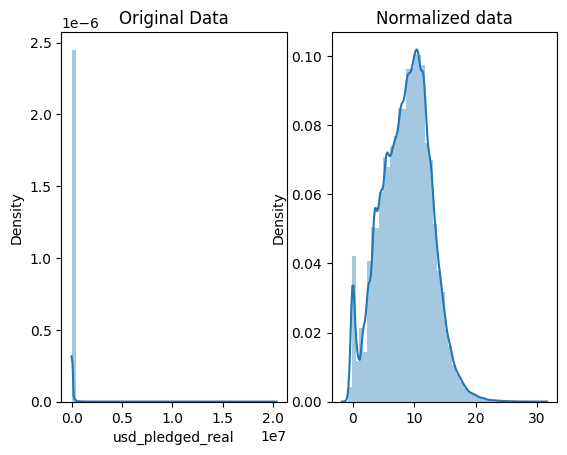

In [26]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0
index_of_positive_pledges.head()

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

<ipython-input-27-e1bc05ad439e>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nonzero_pledges, ax=ax[0])
<ipython-input-27-e1bc05ad439e>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_pledges, ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

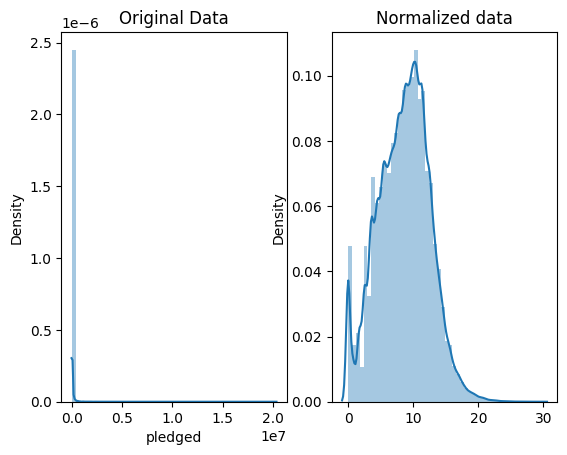

In [27]:
# Your turn!
# We looked as the usd_pledged_real column. What about the "pledged" column? Does it have the same info?
# Get only positive pledges
index_of_nonzero_pledges = kickstarters_2017.pledged > 0
index_of_nonzero_pledges.head()
nonzero_pledges = kickstarters_2017.pledged.loc[index_of_nonzero_pledges]

# normalize the pledges (w/ Box-Cox)
normal_pledges = stats.boxcox(nonzero_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(nonzero_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normal_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

## 3. Merging data (BONUS - DO IT YOUR OWN)
Joining and merging DataFrames is one of the crucial process to start with data analysis and machine learning tasks. This is because most of the cases, data comes from multiple source and files. We need to combine/intergarte  all the data in one place, or in this tutorial - dataframe<br>

In [28]:
#concate two sources of data (dataframe)
dfcombine = pd.concat([dfpassing, dfgrade]) #will join without overlapping column names
dfcombine.head()

,Name,Score,binned,passing,grade
0,Suzani,63,"(50, 75]",fail,NaN
1,Enna,48,"(25, 50]",pass,NaN
2,Anuar,56,"(50, 75]",fail,NaN
3,Amil,75,"(50, 75]",fail,NaN
4,Ravi,32,"(25, 50]",pass,NaN


In [29]:
#concate two sources of data (dataframe)
dfcombine1 = pd.concat([df2, dfgrade], axis =1) #overlapping column names
print(dfcombine1)

     Name  Score     binned grade    Name  Score     binned grade
0  Suzani     63   (50, 75]     2  Suzani     63   (50, 75]     B
1    Enna     48   (25, 50]     3    Enna     48   (25, 50]     C
2   Anuar     56   (50, 75]     2   Anuar     56   (50, 75]     B
3    Amil     75   (50, 75]     2    Amil     75   (50, 75]     B
4    Ravi     32   (25, 50]     3    Ravi     32   (25, 50]     C
5  Shikin     77  (75, 100]     1  Shikin     77  (75, 100]     A
6     Ali     85  (75, 100]     1     Ali     85  (75, 100]     A
7             50   (25, 50]     3             50   (25, 50]     C


In [30]:
df_merge_col = pd.merge(dfpassing, dfgrade, on='Name')
df_merge_col.head()

,Name,Score_x,binned_x,passing,Score_y,binned_y,grade
0,Suzani,63,"(50, 75]",fail,63,"(50, 75]",B
1,Enna,48,"(25, 50]",pass,48,"(25, 50]",C
2,Anuar,56,"(50, 75]",fail,56,"(50, 75]",B
3,Amil,75,"(50, 75]",fail,75,"(50, 75]",B
4,Ravi,32,"(25, 50]",pass,32,"(25, 50]",C


## EXERCISE 2: DO IT ON YOUR OWN<br>
to know more about joining dataframe, we will use datacamp tutorial.<br>
Go to the link: https://www.datacamp.com/community/tutorials/joining-dataframes-pandas <br>
1. copy paste all the codes on colab and run and understand it <br>
2. save it and make a shared link 'anyone can view' the code <br>
3. This is your lab attendance. <br>

##pandas Concatenate
Start by importing the library you will be using throughout the tutorial: pandas

In [31]:
import pandas as pd


You will be performing all the operations in this tutorial on the dummy DataFrames that you will create. To create a DataFrame, you can use a Python dictionary like:

In [32]:
dummy_data1 = {
        'id': ['1', '2', '3', '4', '5'],
        'Feature1': ['A', 'C', 'E', 'G', 'I'],
        'Feature2': ['B', 'D', 'F', 'H', 'J']}


Here, the keys of the dictionary dummy_data1 are the column names, and the values in the list are the data corresponding to each observation or row. To transform this into a pandas DataFrame, you will use the DataFrame() function of pandas, along with its columns argument to name your columns:

In [33]:
df1 = pd.DataFrame(dummy_data1, columns = ['id', 'Feature1', 'Feature2'])

df1


,id,Feature1,Feature2
0,1,A,B
1,2,C,D
2,3,E,F
3,4,G,H
4,5,I,J


As you can notice, you now have a DataFrame with three columns id, Feature1, and Feature2. There is an additional un-named column which pandas intrinsically creates as the row labels. Similar to the previous DataFrame df1, you will create two more DataFrames df2 and df3 :

In [34]:
dummy_data2 = {
        'id': ['1', '2', '6', '7', '8'],
        'Feature1': ['K', 'M', 'O', 'Q', 'S'],
        'Feature2': ['L', 'N', 'P', 'R', 'T']}


In [35]:
df2 = pd.DataFrame(dummy_data2, columns = ['id', 'Feature1', 'Feature2'])

df2


,id,Feature1,Feature2
0,1,K,L
1,2,M,N
2,6,O,P
3,7,Q,R
4,8,S,T


In [36]:
dummy_data3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'Feature3': [12, 13, 14, 15, 16, 17, 15, 12, 13, 23]}


In [37]:
df3 = pd.DataFrame(dummy_data3, columns = ['id', 'Feature3'])

df3


,id,Feature3
0,1,12
1,2,13
2,3,14
3,4,15
4,5,16
5,7,17
6,8,15
7,9,12
8,10,13
9,11,23


##concat()
To simply concatenate the DataFrames along the row you can use the concat() function in pandas. You will have to pass the names of the DataFrames in a list as the argument to the concat() function:

In [38]:
df_row = pd.concat([df1, df2])

df_row


,id,Feature1,Feature2
0,1,A,B
1,2,C,D
2,3,E,F
3,4,G,H
4,5,I,J
0,1,K,L
1,2,M,N
2,6,O,P
3,7,Q,R
4,8,S,T


You can notice that the two DataFrames df1 and df2 are now concatenated into a single DataFrame df_row along the row. However, the row labels seem to be wrong. If you want the row labels to adjust automatically according to the join, you will have to set the argument ignore_index as True while calling the concat() function:

In [39]:
df_row_reindex = pd.concat([df1, df2], ignore_index=True)

df_row_reindex


,id,Feature1,Feature2
0,1,A,B
1,2,C,D
2,3,E,F
3,4,G,H
4,5,I,J
5,1,K,L
6,2,M,N
7,6,O,P
8,7,Q,R
9,8,S,T


Now the row labels are correct!

pandas also provides you with an option to label the DataFrames, after the concatenation, with a key so that you may know which data came from which DataFrame. You can achieve the same by passing additional argument keys specifying the label names of the DataFrames in a list. Here you will perform the same concatenation with keys as x and y for DataFrames df1 and df2 respectively.

In [40]:
frames = [df1,df2]
df_keys = pd.concat(frames, keys=['x', 'y'])

df_keys


id Feature1 Feature2
x 0  1        A        B
  1  2        C        D
  2  3        E        F
  3  4        G        H
  4  5        I        J
y 0  1        K        L
  1  2        M        N
  2  6        O        P
  3  7        Q        R
  4  8        S        T

Mentioning the keys also makes it easy to retrieve data corresponding to a particular DataFrame. You can retrieve the data of DataFrame df2 which had the label y by using the loc method:

In [41]:
df_keys.loc['y']


,id,Feature1,Feature2
0,1,K,L
1,2,M,N
2,6,O,P
3,7,Q,R
4,8,S,T


You can also pass a dictionary to concat(), in which case the dictionary keys will be used for the keys argument (unless other keys are specified):

In [42]:
pieces = {'x': df1, 'y': df2}

df_piece = pd.concat(pieces)

df_piece


id Feature1 Feature2
x 0  1        A        B
  1  2        C        D
  2  3        E        F
  3  4        G        H
  4  5        I        J
y 0  1        K        L
  1  2        M        N
  2  6        O        P
  3  7        Q        R
  4  8        S        T

It is worth noting that concat() makes a full copy of the data, and continuosly reusing this function can create a significant performance hit. If you need to use the operation over several datasets, use a list comprehension.

In [43]:
#frames = [ process_your_file(f) for f in files ]
#result = pd.concat(frames)


To concatenate DataFrames along column, you can specify the axis parameter as 1 :

In [44]:
df_col = pd.concat([df1,df2], axis=1)

df_col


,id,Feature1,Feature2,id,Feature1,Feature2
0,1,A,B,1,K,L
1,2,C,D,2,M,N
2,3,E,F,6,O,P
3,4,G,H,7,Q,R
4,5,I,J,8,S,T


##pandas Merge DataFrames
Another ubiquitous operation related to DataFrames is the merging operation. Two DataFrames might hold different kinds of information about the same entity and be linked by some common feature/column. To join these DataFrames, pandas provides multiple functions like concat(), merge() , join(), etc. In this section, you will practice using merge() function of pandas.

You can join DataFrames df_row (which you created by concatenating df1 and df2 along the row) and df3 on the common column (or key) id. To do so, pass the names of the DataFrames and an additional argument on as the name of the common column, here id, to the merge() function:

You can notice that the DataFrames are now merged into a single DataFrame based on the common values present in the id column of both the DataFrames. For example, here id value 1 was present with both A, B and K, L in the DataFrame df_row hence this id got repeated twice in the final DataFrame df_merge_col with repeated value 12 of Feature3 which came from DataFrame df3.

It might happen that the column on which you want to merge the DataFrames have different names (unlike in this case). For such merges, you will have to specify the arguments left_on as the left DataFrame name and right_on as the right DataFrame name, like :

In [45]:
df_merge_col = pd.merge(df_row, df3, on='id')

df_merge_col


,id,Feature1,Feature2,Feature3
0,1,A,B,12
1,2,C,D,13
2,3,E,F,14
3,4,G,H,15
4,5,I,J,16
5,1,K,L,12
6,2,M,N,13
7,7,Q,R,17
8,8,S,T,15


You can notice that the DataFrames are now merged into a single DataFrame based on the common values present in the id column of both the DataFrames. For example, here id value 1 was present with both A, B and K, L in the DataFrame df_row hence this id got repeated twice in the final DataFrame df_merge_col with repeated value 12 of Feature3 which came from DataFrame df3.

It might happen that the column on which you want to merge the DataFrames have different names (unlike in this case). For such merges, you will have to specify the arguments left_on as the left DataFrame name and right_on as the right DataFrame name, like :

In [46]:
df_merge_difkey = pd.merge(df_row, df3, left_on='id', right_on='id')

df_merge_difkey


,id,Feature1,Feature2,Feature3
0,1,A,B,12
1,2,C,D,13
2,3,E,F,14
3,4,G,H,15
4,5,I,J,16
5,1,K,L,12
6,2,M,N,13
7,7,Q,R,17
8,8,S,T,15


You can also append rows to a DataFrame by passing a Series or dict to append() function which returns a new DataFrame:

In [47]:
# Creating a new row as a Series
add_row = pd.Series(['10', 'X1', 'X2', 'X3'],
                    index=['id', 'Feature1', 'Feature2', 'Feature3'])

# Using pd.concat() to add the new row to the DataFrame
df_add_row = pd.concat([df_merge_col, add_row.to_frame().T], ignore_index=True)

# Display the updated DataFrame
df_add_row


,id,Feature1,Feature2,Feature3
0,1,A,B,12
1,2,C,D,13
2,3,E,F,14
3,4,G,H,15
4,5,I,J,16
5,1,K,L,12
6,2,M,N,13
7,7,Q,R,17
8,8,S,T,15
9,10,X1,X2,X3


##Types of pandas Join
In this section, you will practice the various join logics available to merge pandas DataFrames based on some common column/key. The logic behind these joins is very much the same that you have in SQL when you join tables.

#Full Outer Join
The FULL OUTER JOIN combines the results of both the left and the right outer joins. The joined DataFrame will contain all records from both the DataFrames and fill in NaNs for missing matches on either side. You can perform a full outer join by specifying the how argument as outer in the merge() function:

In [48]:
df_outer = pd.merge(df1, df2, on='id', how='outer')

df_outer


,id,Feature1_x,Feature2_x,Feature1_y,Feature2_y
0,1,A,B,K,L
1,2,C,D,M,N
2,3,E,F,NaN,NaN
3,4,G,H,NaN,NaN
4,5,I,J,NaN,NaN
5,6,NaN,NaN,O,P
6,7,NaN,NaN,Q,R
7,8,NaN,NaN,S,T


You can notice that the resulting DataFrame had all the entries from both the tables with NaN values for missing matches on either side. However, one more thing to notice is the suffix which got appended to the column names to show which column came from which DataFrame. The default suffixes are x and y, however, you can modify them by specifying the suffixes argument in the merge() function:

In [49]:
df_suffix = pd.merge(df1, df2, left_on='id',right_on='id',how='outer',suffixes=('_left','_right'))

df_suffix


,id,Feature1_left,Feature2_left,Feature1_right,Feature2_right
0,1,A,B,K,L
1,2,C,D,M,N
2,3,E,F,NaN,NaN
3,4,G,H,NaN,NaN
4,5,I,J,NaN,NaN
5,6,NaN,NaN,O,P
6,7,NaN,NaN,Q,R
7,8,NaN,NaN,S,T


##Inner Join
The INNER JOIN produces only the set of records that match in both DataFrame A and DataFrame B. You have to pass inner in the how argument of merge() function to do inner join:

In [50]:
df_inner = pd.merge(df1, df2, on='id', how='inner')

df_inner


,id,Feature1_x,Feature2_x,Feature1_y,Feature2_y
0,1,A,B,K,L
1,2,C,D,M,N


##Right Join
The RIGHT JOIN produces a complete set of records from DataFrame B (right DataFrame), with the matching records (where available) in DataFrame A (left DataFrame). If there is no match, the right side will contain null. You have to pass right in the how argument of merge() function to do right join:

In [51]:
df_right = pd.merge(df1, df2, on='id', how='right')

df_right


,id,Feature1_x,Feature2_x,Feature1_y,Feature2_y
0,1,A,B,K,L
1,2,C,D,M,N
2,6,NaN,NaN,O,P
3,7,NaN,NaN,Q,R
4,8,NaN,NaN,S,T


##Left Join
The LEFT JOIN produces a complete set of records from DataFrame A (left DataFrame), with the matching records (where available) in DataFrame B (right DataFrame). If there is no match, the left side will contain null. You have to pass left in the how argument of merge() function to do left join:

In [52]:
df_left = pd.merge(df1, df2, on='id', how='left')

df_left


,id,Feature1_x,Feature2_x,Feature1_y,Feature2_y
0,1,A,B,K,L
1,2,C,D,M,N
2,3,E,F,NaN,NaN
3,4,G,H,NaN,NaN
4,5,I,J,NaN,NaN


##Joining on index
Sometimes you may have to perform the join on the indexes or the row labels. To do so, you have to specify right_index (for the indexes of the right DataFrame) and left_index (for the indexes of the left DataFrame) as True :

In [53]:
df_index = pd.merge(df1, df2, right_index=True, left_index=True)

df_index


,id_x,Feature1_x,Feature2_x,id_y,Feature1_y,Feature2_y
0,1,A,B,1,K,L
1,2,C,D,2,M,N
2,3,E,F,6,O,P
3,4,G,H,7,Q,R
4,5,I,J,8,S,T


##Time-series Friendly Merging
Pandas provides special functions for merging Time-series DataFrames. Perhaps the most useful and popular one is the merge_asof() function. The merge_asof() is similar to an ordered left-join except that you match on nearest key rather than equal keys. For each row in the left DataFrame, you select the last row in the right DataFrame whose on key is less than the left’s key. Both DataFrames must be sorted by the key.

Optionally an asof merge can perform a group-wise merge. This matches the by key equally, in addition to the nearest match on the on key.

For example, you might have trades and quotes, and you want to asof merge them. Here the left DataFrame is chosen as trades and right DataFrame as quotes. They are asof merged on key time and group-wise merged by their ticker symbol.

In [54]:
trades = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
                            '20160525 13:30:00.038',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.048']),
    'ticker': ['MSFT', 'MSFT','GOOG', 'GOOG', 'AAPL'],
    'price': [51.95, 51.95,720.77, 720.92, 98.00],
    'quantity': [75, 155,100, 100, 100]},
    columns=['time', 'ticker', 'price', 'quantity'])

quotes = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
                            '20160525 13:30:00.023',
                            '20160525 13:30:00.030',
                            '20160525 13:30:00.041',
                            '20160525 13:30:00.048',
                            '20160525 13:30:00.049',
                            '20160525 13:30:00.072',
                            '20160525 13:30:00.075']),
    'ticker': ['GOOG', 'MSFT', 'MSFT','MSFT', 'GOOG', 'AAPL', 'GOOG','MSFT'],
    'bid': [720.50, 51.95, 51.97, 51.99,720.50, 97.99, 720.50, 52.01],
    'ask': [720.93, 51.96, 51.98, 52.00,720.93, 98.01, 720.88, 52.03]},
    columns=['time', 'ticker', 'bid', 'ask'])

In [55]:
trades


,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [56]:
quotes


,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [57]:
df_merge_asof = pd.merge_asof(trades, quotes,
              on='time',
              by='ticker')

df_merge_asof


,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


If you observe carefully, you can notice the reason behind NaN appearing in the AAPL ticker row. Since the right DataFrame quotes didn't have any time value less than 13:30:00.048 (the time in the left table) for AAPL ticker, NaNs were introduced in the bid and ask columns.

You can also set a predefined tolerance level for time column. Suppose you only want asof merge within 2ms between the quote time and the trade time, then you will have to specify tolerance argument:

In [58]:
df_merge_asof_tolerance = pd.merge_asof(trades, quotes,
              on='time',
              by='ticker',
              tolerance=pd.Timedelta('2ms'))

df_merge_asof_tolerance


,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,NaN,NaN
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


---


# About the Author:  

 [Sabrina Tiun]( https://ftsm.ukm.my/sabrina) has a PhD in Computer Science (NLP) and  her research mainly focused on natural language processing and text analytics using machine learning. She has been a senior lecturer at Faculty Technology and Information Science, and a researcher at ASLAN LAB, Centre for Artificial Intelligence, UKM since 2011.  

Copyright &copy; 2019 ASLAN Lab, CAIT, UKM. This notebook and its source code are released under the terms of the [MIT License](https://en.wikipedia.org/wiki/MIT_License).